In [1]:
from discopy.drawing import Equation
from spiders import W, Id, Z, Swap, boxes
from pyfile import eq

In [2]:
def T(A, n):
    # return A^n
    if n == 1: return A
    return A @ T(A, n-1)

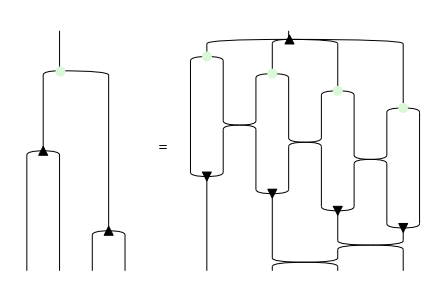

True

In [3]:
p22 = Z(1, 2) >> W() @ W()
p2 = W(4) >> T(Z(1, 2), 4) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(W(2).dagger(), 4) >> Id(2) @ Swap >> Id(1) @ Swap @ Id(1)
Equation(p22, p2).draw()
eq(p22, p2)

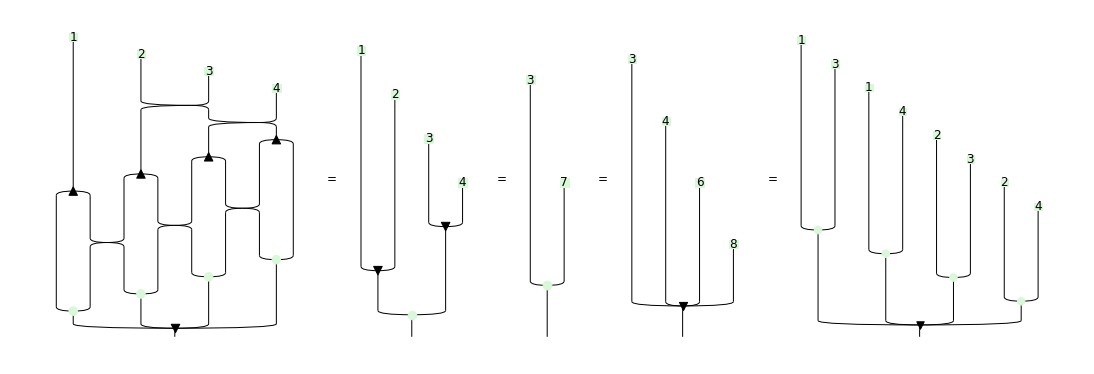

In [4]:
from spiders import ZBox
# (a + b)(c + d) = ac + ad + bc + bd
d1 = boxes([1, 2, 3, 4]) >> p2.dagger()
d2 = boxes([1, 2, 3, 4]) >> p22.dagger()
d3 = boxes([1 + 2, 3 + 4]) >> Z(2, 1)
d4 = ZBox(0, 1, (1 + 2) * (3 + 4))
d4 = boxes([1*3, 1*4, 2*3, 2*4]) >> W(4, False)
d5 = boxes([1, 3, 1, 4, 2, 3, 2, 4]) >> T(Z(2, 1), 4) >> W(4, False)
Equation(d1, d2, d3, d4, d5).draw(figsize=(15, 5))

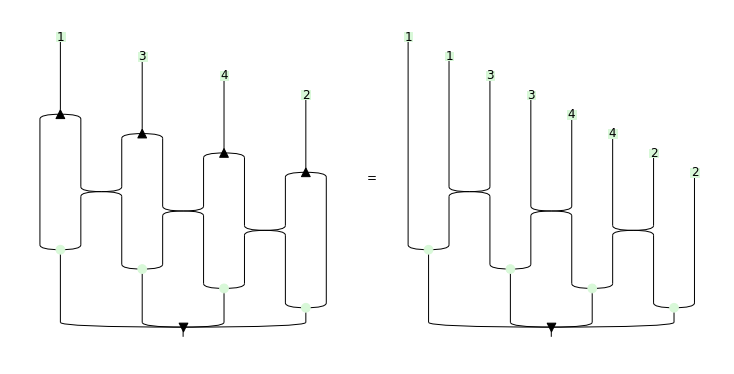

True

In [5]:
e1 = boxes([1, 3, 4, 2]) >> T(W(2), 4) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(Z(2, 1), 4) >> W(4, False)
e3 = boxes([1, 1, 3, 3, 4, 4, 2, 2]) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >>  T(Z(2, 1), 4) >> W(4, False)
Equation(e1, e3).draw(figsize=(10, 5))
eq(e1, e3) # swaps on 2 are weird...


### distrib proof

1. Push through boxes

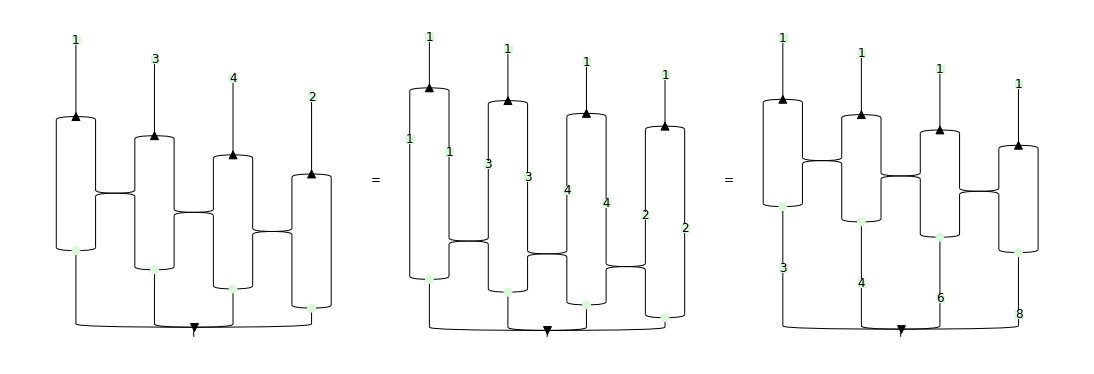

True

In [6]:
e11 = boxes([1, 1, 1, 1]) >> T(W(2), 4) >> boxes([1, 1, 3, 3, 4, 4, 2, 2], False) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(Z(2, 1), 4) >> W(4, False)
e12 = boxes([1, 1, 1, 1]) >> T(W(2), 4) >>  Id(1) @ Swap @ Swap @ Swap @ Id(1) >> ZBox(2, 1, 1*3) @ ZBox(2, 1, 1*4) @ ZBox(2, 1, 3*2) @ ZBox(2, 1, 2*4) >> W(4, False)
e13 = boxes([1, 1, 1, 1]) >> T(W(2), 4) >>  Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(Z(2, 1), 4) >> boxes([3, 4, 6, 8], False) >> W(4, False)
Equation(e1, e11, e13).draw(figsize=(15, 5))
eq(e1, e13)

2. Trialgebra, then copy

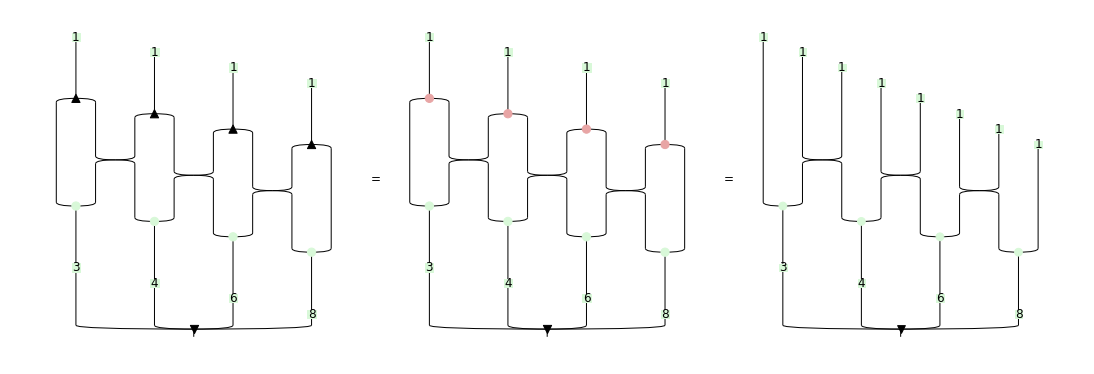

True

In [7]:
from spiders import X
e14 = boxes([1] * 4) >> T(X(1, 2), 4) >>  Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(Z(2, 1), 4) >> boxes([3, 4, 6, 8], False) >> W(4, False) 
e15 = boxes([1] * 8) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(Z(2, 1), 4) >> boxes([3, 4, 6, 8], False) >> W(4, False) 
Equation(e13, e14, e15).draw(figsize=(15, 5))
eq(e13, e15)

3. Re-fuse

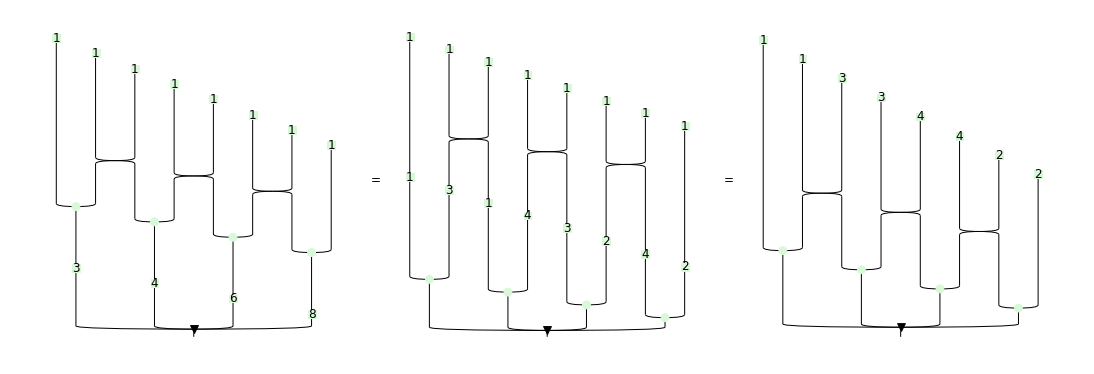

True

In [8]:
e16 = boxes([1]*8) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> boxes([1, 3, 1, 4, 3, 2, 4, 2], False) >> T(Z(2, 1), 4) >> W(4, False)
e17 = boxes([1, 1, 3, 3, 4, 4, 2, 2]) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(Z(2, 1), 4) >> W(4, False)
Equation(e15, e16, e17).draw(figsize=(15, 5))
eq(e15, e17)